## Objective
* Explore and visualize the dataset.
* Build a classification model to predict
* Optimize the model using appropriate techniques

## Import Importance Libraries

In [1]:
#Utility
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import sys
import pickle
from scipy.stats import skew
from packaging import version
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
import plotly.io as pio
pio.renderers.default = 'notebook' 
pyo.init_notebook_mode(connected=True)
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder,PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, recall_score, confusion_matrix

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
path = '../dataset/BankChurners.csv'

In [3]:
df = pd.read_csv(path)

## Describing Dataset

In [4]:
def describe_all(df: pd.DataFrame):
    print(f'{"         Describe Report"}')
    print(f'Dataset : {df.shape[0]} rows {df.shape[1]} columns')
    print(f'{"Column Names":<30} {"Unique Values":<20} {"Type":<20}')
    print('-'*60)

    for col in df.keys():
        print(f'{col:<30}  {df[col].nunique():<30} {str(df[col].dtypes):<30}')

    print(f'{"         NULL Report"}')
    print(f'{"Column Names":<30} {"Counts":<30}')
    print('-'*60)
    for col in df.keys():
        print(f'{col:<30} {df[col].isnull().sum()}')
        

In [5]:
describe_all(df)

         Describe Report
Dataset : 10127 rows 23 columns
Column Names                   Unique Values        Type                
------------------------------------------------------------
CLIENTNUM                       10127                          int64                         
Attrition_Flag                  2                              object                        
Customer_Age                    45                             int64                         
Gender                          2                              object                        
Dependent_count                 6                              int64                         
Education_Level                 7                              object                        
Marital_Status                  4                              object                        
Income_Category                 6                              object                        
Card_Category                   4                        

In [6]:
df.sample(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
212   805543158  Existing Customer            52      M                3   
1536  718651083  Existing Customer            35      F                2   
6279  758642733  Existing Customer            48      F                1   
7786  720766908  Attrited Customer            40      F                2   
1631  715859058  Existing Customer            54      M                3   

     Education_Level Marital_Status Income_Category Card_Category  \
212         Graduate        Married         $120K +          Blue   
1536        Graduate         Single         Unknown          Blue   
6279        Graduate         Single  Less than $40K          Blue   
7786      Uneducated         Single  Less than $40K          Blue   
1631   Post-Graduate        Married         $120K +          Blue   

      Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
212               47  ...       11086.0                 2207           8879.0   
1536              25  ...       10329.0                  514           9815.0   
6279              41  ...        1860.0                 1054            806.0   
7786              28  ...        3021.0                    0           3021.0   
1631              42  ...        3092.0                 2165            927.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
212                  0.869             1523              40   
1536                 0.708             2461              68   
6279                 0.963             5163              73   
7786                 0.694             2814              37   
1631                 0.676             1369              37   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
212                 1.105                  0.199   
1536                0.838                  0.050   
6279                0.973                  0.567   
7786                0.321                  0.000   
1631                0.542                  0.700   

      Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
212                                            0.000314                                                                                    
1536                                           0.000158                                                                                    
6279                                           0.000031                                                                                    
7786                                           0.991530                                                                                    
1631                                           0.000630                                                                                    

      Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
212                                             0.99969                                                                                   
1536                                            0.99984                                                                                   
6279                                            0.99997                                                                                   
7786                                            0.00847                                                                                   
1631                                            0.99937                                                                                   

[5 rows x 23 columns]

In [7]:
df.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'Naive_Bayes1',
                  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2':'Naive_Bayes2'},
         inplace=True)

## EDA 

In [8]:
def make_box_hist(df: pd.DataFrame):
    fig = make_subplots(rows=2,cols=1)

    f1 = go.Box(x=df,name=df.name+' Box Plot', boxmean=True)
    f2 = go.Histogram(x=df,name=df.name+' Hist Plot')

    fig.add_trace(f1,row=1,col=1)
    fig.add_trace(f2, row=2, col=1)

    fig.update_layout(width=1000, height=500, title_text=df.name)
    fig.show()

In [9]:
make_box_hist(df['Customer_Age'])

In [10]:
make_box_hist(df['Dependent_count'])

In [11]:
ex.pie(df, names='Education_Level',title='Propotion Of Education Levels',hole=0.33)

In [12]:
ex.pie(df,names='Marital_Status',title='Propotion Of Different Marriage Statuses',hole=0.33)

In [13]:
ex.pie(df,names='Income_Category',title='Propotion Of Different Income Levels',hole=0.33)

In [14]:
ex.pie(df,names='Card_Category',title='Propotion Of Different Card Categories',hole=0.33)

In [15]:
make_box_hist(df['Months_on_book'])

In [16]:
make_box_hist(df['Total_Relationship_Count'])

In [17]:
make_box_hist(df['Months_Inactive_12_mon'])

In [18]:
make_box_hist(df['Credit_Limit'])

In [19]:
make_box_hist(df['Total_Trans_Amt'])

In [20]:
ex.pie(df,names='Attrition_Flag',title='Proportion of churn vs not churn customers',hole=0.33)

## Feature Engineering
# Objective
* เพิ่ม feature ใหม่จาก feature เดิม
* Encode Object feature
* Scale Data
* handling outlier


In [21]:
df.sample(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
5893  710116833  Attrited Customer            59      F                1   
2732  770952933  Existing Customer            53      F                1   
6423  720470133  Existing Customer            59      M                0   
9758  719379858  Attrited Customer            39      M                1   
7117  779261433  Existing Customer            54      F                2   

     Education_Level Marital_Status Income_Category Card_Category  \
5893     High School         Single     $40K - $60K          Blue   
2732         Unknown        Married  Less than $40K          Blue   
6423        Graduate         Single  Less than $40K          Blue   
9758        Graduate        Married    $80K - $120K          Blue   
7117        Graduate         Single  Less than $40K          Blue   

      Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
5893              36  ...        1665.0                    0           1665.0   
2732              40  ...        2383.0                 1938            445.0   
6423              36  ...        3604.0                 1483           2121.0   
9758              36  ...       24239.0                    0          24239.0   
7117              36  ...        2043.0                 1597            446.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
5893                 1.010             2748              40   
2732                 0.597             1616              37   
6423                 0.597             4576              87   
9758                 0.940             8549              73   
7117                 0.814             3553              61   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Naive_Bayes1  Naive_Bayes2  
5893                0.333                  0.000      0.996390      0.003609  
2732                0.682                  0.813      0.000337      0.999660  
6423                0.706                  0.411      0.000260      0.999740  
9758                0.780                  0.000      0.994470      0.005530  
7117                0.694                  0.782      0.000055      0.999940  

[5 rows x 23 columns]

In [22]:
df.keys()

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes1', 'Naive_Bayes2'],
      dtype='object')

In [23]:
def feature_en(df):
    df = df.copy()
    #เพิ่ม Ratio feature
    df['Trans_Amt_per_Ct'] = df['Total_Trans_Amt'] / (df['Total_Trans_Ct'] + 1)
    df['Avg_Trans_per_Month'] = df['Total_Trans_Ct'] / (df['Months_on_book'] + 1)
    df['Inactive_Month_Ratio'] = df['Months_Inactive_12_mon'] / df['Months_on_book']
    df['Contact_Rate'] = df['Contacts_Count_12_mon'] / df['Months_on_book']
    df['Revolving_Credit_Ratio'] = df['Total_Revolving_Bal'] / (df['Credit_Limit'] + 1)
    df['Unused_Credit_Ratio'] = df['Avg_Open_To_Buy'] / (df['Credit_Limit'] + 1)
    #เพิ่มพฤติกรรมการใช้บัตร
    df['Amt_Chng_Flag'] = (df['Total_Amt_Chng_Q4_Q1'] > 1.0).astype(int)
    df['Ct_Chng_Flag'] = (df['Total_Ct_Chng_Q4_Q1'] > 1.0).astype(int)
    #เพิ่มความสัมพันธ์
    df['Loyalty_Index'] = df['Total_Relationship_Count'] + (df['Months_on_book'] / 12)
    df['Engagement_Score'] = df['Contacts_Count_12_mon'] + df['Total_Trans_Ct']
    #เพิ่มความสัมพันครอบครัว
    df['Age_per_Dependent'] = df['Customer_Age'] / (df['Dependent_count'] + 1)
    #group
    df['High_Income'] = df['Income_Category'].isin(['$80K - $120K', '$120K +']).astype(int)
    df['High_Value_Customer'] = ((df['Credit_Limit'] > 15000) & (df['Total_Trans_Amt'] > 5000)).astype(int)
    #รวม neive bayes
    df['NB_Mean'] = (df['Naive_Bayes1'] + df['Naive_Bayes2']) / 2
    df['NB_Diff'] = abs(df['Naive_Bayes1'] - df['Naive_Bayes2'])
    df = df.drop('CLIENTNUM',axis=1)

    return df

In [24]:
df = feature_en(df)
df

Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  ...  Unused_Credit_Ratio  \
0                  39                         5  ...             0.938702   
1                  44                         6  ...             0.895240   
2                  36                         4  ...             0.999708   
3                  34                         3  ...             0.240193   
4                  21                         5  ...             0.999788   
...               ...                       ...  ...                  ...   
10122              40                         3  ...             0.537463   
10123              25                         4  ...             0.488780   
10124              36                         5  ...             0.999815   
10125              36                         4  ...             0.999811   
10126              25                         6  ...             0.811146   

       Amt_Chng_Flag  Ct_Chng_Flag  Loyalty_Index  Engagement_Score  \
0                  1             1       8.250000                45   
1                  1             1       9.666667                35   
2                  1             1       7.000000                20   
3                  1             1       5.833333                21   
4                  1             1       6.750000                28   
...              ...           ...            ...               ...   
10122              0             0       6.333333               120   
10123              0             0       6.083333                72   
10124              0             0       8.000000                64   
10125              0             0       7.000000                65   
10126              0             0       8.083333                65   

       Age_per_Dependent  High_Income  High_Value_Customer   NB_Mean   NB_Diff  
0              11.250000            0                    0  0.500002  0.999817  
1               8.166667            0                    0  0.499998  0.999883  
2              12.750000            1                    0  0.500001  0.999959  
3               8.000000            0                    0  0.500002  0.999736  
4              10.000000            0                    0  0.500001  0.999958  
...                  ...          ...                  ...       ...       ...  
10122          16.666667       

In [25]:
df.keys()

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes1', 'Naive_Bayes2', 'Trans_Amt_per_Ct',
       'Avg_Trans_per_Month', 'Inactive_Month_Ratio', 'Contact_Rate',
       'Revolving_Credit_Ratio', 'Unused_Credit_Ratio', 'Amt_Chng_Flag',
       'Ct_Chng_Flag', 'Loyalty_Index', 'Engagement_Score',
       'Age_per_Dependent', 'High_Income', 'High_Value_Customer', 'NB_Mean',
       'NB_Diff'],
      dtype='object')

## หา insight เพิ่มเติม

In [26]:
fig = ex.box(df, x='Attrition_Flag', y='Total_Trans_Ct', color='Attrition_Flag',
             title='Total Transactions Count vs Attrition Status')
fig.show()

Insight : ลูกค้าที่ยังอยู่มักมี transaction มากกว่า → ใช้งานน้อย เสี่ยงเลิกใช้บริการ

Action : เสนอสิทธิประโยชน์สำหรับคนที่มียอด transec น้อย

In [27]:
fig = ex.histogram(df, x='Avg_Utilization_Ratio', color='Attrition_Flag', 
                   nbins=30, marginal='box', barmode='overlay',
                   title='Utilization Ratio by Attrition Status')
fig.show()

Insight : ถ้าค่า utilization สูงหรือต่ำเกิน อาจเป็นสัญญาณของ churn

Action : เพิ่มการสื่อสารหรือแคมเปญสำหรับกลุ่มนี้

In [28]:
fig = ex.scatter(df, x='Customer_Age', y='Dependent_count', color='Attrition_Flag',
                 title='Age vs Number of Dependents')
fig.show()

In [29]:
fig = ex.scatter(df, x='Credit_Limit', y='Total_Revolving_Bal', color='Attrition_Flag',
                 size='Total_Trans_Amt', hover_data=['Avg_Open_To_Buy'],
                 title='Credit Limit vs Revolving Balance by Attrition')
fig.show()

In [30]:
fig = ex.histogram(df, x='Education_Level', color='Attrition_Flag', barmode='group',
                   category_orders={'Education_Level': ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']},
                   title='Attrition by Education Level')
fig.show()

Insight : จะพบว่าผู้ที่มีการศึกษาเป็น Graduate มียอดเลิกใช้บริการเยอะกว่าผู้ที่มีการศึกษาแบบอื่น

Action : 

## Encode

In [31]:
def encode(df: pd.DataFrame) -> pd.DataFrame:
    encoder = OrdinalEncoder()

    for col in df.keys():
        if df[col].dtypes=='O':
            df[col] = encoder.fit_transform(df[col].values.reshape(-1,1))

    return df

In [32]:
df = encode(df)
df

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0                 1.0            45     1.0                3              3.0   
1                 1.0            49     0.0                5              2.0   
2                 1.0            51     1.0                3              2.0   
3                 1.0            40     0.0                4              3.0   
4                 1.0            40     1.0                3              5.0   
...               ...           ...     ...              ...              ...   
10122             1.0            50     1.0                2              2.0   
10123             0.0            41     1.0                2              6.0   
10124             0.0            44     0.0                1              3.0   
10125             0.0            30     1.0                2              2.0   
10126             0.0            43     0.0                2              2.0   

       Marital_Status  Income_Category  Card_Category  Months_on_book  \
0                 1.0              2.0            0.0              39   
1                 2.0              4.0            0.0              44   
2                 1.0              3.0            0.0              36   
3                 3.0              4.0            0.0              34   
4                 1.0              2.0            0.0              21   
...               ...              ...            ...             ...   
10122             2.0              1.0            0.0              40   
10123             0.0              1.0            0.0              25   
10124             1.0              4.0            0.0              36   
10125             3.0              1.0            0.0              36   
10126             1.0              4.0            3.0              25   

       Total_Relationship_Count  ...  Unused_Credit_Ratio  Amt_Chng_Flag  \
0                             5  ...             0.938702              1   
1                             6  ...             0.895240              1   
2                             4  ...             0.999708              1   
3                             3  ...             0.240193              1   
4                             5  ...             0.999788              1   
...                         ...  ...                  ...            ...   
10122                         3  ...             0.537463              0   
10123                         4  ...             0.488780              0   
10124                         5  ...             0.999815              0   
10125                         4  ...             0.999811              0   
10126                         6  ...             0.811146              0   

       Ct_Chng_Flag  Loyalty_Index  Engagement_Score  Age_per_Dependent  \
0                 1       8.250000                45          11.250000   
1                 1       9.666667                35           8.166667   
2                 1       7.000000                20          12.750000   
3                 1       5.833333                21           8.000000   
4                 1       6.750000                28          10.000000   
...             ...            ...               ...                ...   
10122             0       6.333333               120          16.666667   
10123             0       6.083333                72          13.666667   
10124             0       8.000000                64          22.000000   
10125             0       7.000000                65          10.000000   
10126             0       8.083333                65          14.333333   

       High_Income  High_Value_Customer   NB_Mean   NB_Diff  
0                0                    0  0.500002  0.999817  
1                0                    0  0.499998  0.999883  
2                1                    0  0.500001  0.999959  
3                0                    0  0.500002  0.999736  
4                0               

## find outlier

In [33]:
def find_outlier(df: pd.DataFrame) -> dict:
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    out = {}
    for col in df.keys():
        outlier = []
        for i in df[col]:
            if i<lower[col] or i>upper[col]:
                outlier.append(i)

        out[col] = outlier

    return out
    

In [34]:
def outlier_report(outlier : dict):
    print(f'{"        Outlier Report"}')
    print(f'{"Column Names":<30} {"Counts":<30}')
    print('-'*60)
    for col, val in outlier.items():
        print(f'{col:<30} {len(val):<30}')

In [35]:
outlier = find_outlier(df)

In [36]:
outlier_report(outlier)

        Outlier Report
Column Names                   Counts                        
------------------------------------------------------------
Attrition_Flag                 1627                          
Customer_Age                   2                             
Gender                         0                             
Dependent_count                0                             
Education_Level                0                             
Marital_Status                 0                             
Income_Category                0                             
Card_Category                  691                           
Months_on_book                 386                           
Total_Relationship_Count       0                             
Months_Inactive_12_mon         331                           
Contacts_Count_12_mon          629                           
Credit_Limit                   984                           
Total_Revolving_Bal            0                

outlier บาง columns มีเกือบ 10 % ของ Dataset ทั้งหมด ทำให้ไม่สามารถลบทิ้งหรือแทนค่าด้วยค่าทางสถิติได้ ดังนั้นเราจะเลือกใช้ model ที่มีไม่ค่อยมีความไวต่อ outlier 

## check skewness

In [37]:
def check_skewness_plot(df, column):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        subplot_titles=(f"Box Plot of {column}", f"Histogram of {column}"))

    # Box Plot
    fig.add_trace(go.Box(y=df[column], name=column, boxmean=True), row=1, col=1)

    # Histogram
    fig.add_trace(go.Histogram(x=df[column], name=column, nbinsx=30), row=2, col=1)

    fig.update_layout(height=600, width=800, title_text=f'Distribution & Skewness of {column}')
    fig.show()

    # คำนวณค่าความเบ้ (skewness)
    skew_val = skew(df[column].dropna())
    direction = 'positive (right)' if skew_val > 0 else 'negative (left)' if skew_val < 0 else 'symmetric'
    print(f"Skewness of {column}: {skew_val:.3f} → {direction}")

In [38]:
check_skewness_plot(df, 'Total_Trans_Amt')


Skewness of Total_Trans_Amt: 2.041 → positive (right)


In [39]:
check_skewness_plot(df, 'Avg_Utilization_Ratio')

Skewness of Avg_Utilization_Ratio: 0.718 → positive (right)


In [40]:
check_skewness_plot(df, 'Credit_Limit')

Skewness of Credit_Limit: 1.666 → positive (right)


## จัดการกราฟที่เบ้ซ้ายหรือขวาด้วย NormalScaler

In [41]:
def fix_skew(df: pd.DataFrame) -> pd.DataFrame:
    for col in df.keys():
        if df[col].min() <= 0:
            print(f"{col}: มีค่าติดลบหรือเป็น 0 → ใช้ Yeo-Johnson")
            pt = PowerTransformer(method='yeo-johnson')
            df[col + '_fixed'] = pt.fit_transform(df[[col]])
        else:
            sk = skew(df[col].dropna())
            if sk > 1 or sk < -1:
                print(f"{col}: Skewness = {sk:.2f} → ใช้ log1p")
                df[col + '_fixed'] = np.log1p(df[col])
            else:
                print(f"{col}: Skewness = {sk:.2f} → ไม่จำเป็นต้องแก้")
    return df

In [42]:
df = fix_skew(df)

Attrition_Flag: มีค่าติดลบหรือเป็น 0 → ใช้ Yeo-Johnson
Customer_Age: Skewness = -0.03 → ไม่จำเป็นต้องแก้
Gender: มีค่าติดลบหรือเป็น 0 → ใช้ Yeo-Johnson
Dependent_count: มีค่าติดลบหรือเป็น 0 → ใช้ Yeo-Johnson
Education_Level: มีค่าติดลบหรือเป็น 0 → ใช้ Yeo-Johnson
Marital_Status: มีค่าติดลบหรือเป็น 0 → ใช้ Yeo-Johnson
Income_Category: มีค่าติดลบหรือเป็น 0 → ใช้ Yeo-Johnson
Card_Category: มีค่าติดลบหรือเป็น 0 → ใช้ Yeo-Johnson
Months_on_book: Skewness = -0.11 → ไม่จำเป็นต้องแก้
Total_Relationship_Count: Skewness = -0.16 → ไม่จำเป็นต้องแก้
Months_Inactive_12_mon: มีค่าติดลบหรือเป็น 0 → ใช้ Yeo-Johnson
Contacts_Count_12_mon: มีค่าติดลบหรือเป็น 0 → ใช้ Yeo-Johnson
Credit_Limit: Skewness = 1.67 → ใช้ log1p
Total_Revolving_Bal: มีค่าติดลบหรือเป็น 0 → ใช้ Yeo-Johnson
Avg_Open_To_Buy: Skewness = 1.66 → ใช้ log1p
Total_Amt_Chng_Q4_Q1: มีค่าติดลบหรือเป็น 0 → ใช้ Yeo-Johnson
Total_Trans_Amt: Skewness = 2.04 → ใช้ log1p
Total_Trans_Ct: Skewness = 0.15 → ไม่จำเป็นต้องแก้
Total_Ct_Chng_Q4_Q1: มีค่าติ

In [43]:
check_skewness_plot(df, 'Credit_Limit_fixed')

Skewness of Credit_Limit_fixed: 0.457 → positive (right)


# จากที่ดูกราฟ pie เราจะพบว่าข้อมูลเรา imbalanced

## จัดการข้อมูล imbalanced

In [44]:
df

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0                 1.0            45     1.0                3              3.0   
1                 1.0            49     0.0                5              2.0   
2                 1.0            51     1.0                3              2.0   
3                 1.0            40     0.0                4              3.0   
4                 1.0            40     1.0                3              5.0   
...               ...           ...     ...              ...              ...   
10122             1.0            50     1.0                2              2.0   
10123             0.0            41     1.0                2              6.0   
10124             0.0            44     0.0                1              3.0   
10125             0.0            30     1.0                2              2.0   
10126             0.0            43     0.0                2              2.0   

       Marital_Status  Income_Category  Card_Category  Months_on_book  \
0                 1.0              2.0            0.0              39   
1                 2.0              4.0            0.0              44   
2                 1.0              3.0            0.0              36   
3                 3.0              4.0            0.0              34   
4                 1.0              2.0            0.0              21   
...               ...              ...            ...             ...   
10122             2.0              1.0            0.0              40   
10123             0.0              1.0            0.0              25   
10124             1.0              4.0            0.0              36   
10125             3.0              1.0            0.0              36   
10126             1.0              4.0            3.0              25   

       Total_Relationship_Count  ...  Avg_Trans_per_Month_fixed  \
0                             5  ...                   0.717840   
1                             6  ...                   0.550046   
2                             4  ...                   0.432133   
3                             3  ...                   0.451985   
4                             5  ...                   0.820981   
...                         ...  ...                        ...   
10122                         3  ...                   1.349023   
10123                         4  ...                   1.295780   
10124                         5  ...                   0.963793   
10125                         4  ...                   0.984202   
10126                         6  ...                   1.207812   

       Inactive_Month_Ratio_fixed  Contact_Rate_fixed  \
0                       -1.531936            0.244601   
1                       -1.675451           -0.654042   
2                       -1.429342           -2.366874   
3                        1.407889           -1.195240   
4                       -0.574530           -2.366874   
...                           ...                 ...   
10122                   -0.482817            0.195161   
10123                    0.507199            1.197956   
10124                    0.600516            1.023240   
10125                    0.600516            0.404748   
10126                    0.507199            1.869214   

       Revolving_Credit_Ratio_fixed  Amt_Chng_Flag_fixed  Ct_Chng_Flag_fixed  \
0                         -0.766539             3.032885            3.763001   
1                         -0.499351             3.032885            3.763001   
2                         -1.201719             3.032885            3.763001   
3                          1.484476             3.032885            3.763001   
4                         -1.201719             3.032885            3.763001   
...                             ...                  ...                 ...   
10122                      0.896077            -0.329719           -0.265745   
10123                      

In [45]:
oversample = SMOTE()
x, y = oversample.fit_resample(df[df.columns[1:]], df[df.columns[0]])
usampled_df = x.assign(Churn = y)

In [46]:
ohe_data =usampled_df[usampled_df.columns[15:-1]].copy()

usampled_df = usampled_df.drop(columns=usampled_df.columns[15:-1])

In [47]:
ohe_data

Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1144              42             1.625000   
1                 1291              33             3.714000   
2                 1887              20             2.333000   
3                 1171              20             2.333000   
4                  816              28             2.500000   
...                ...             ...                  ...   
16995             2364              42             0.580063   
16996             1983              46             0.327111   
16997             7990              70             0.658516   
16998            10178              61             1.161309   
16999             8682              76             0.801828   

       Avg_Utilization_Ratio  Naive_Bayes1  Naive_Bayes2  Trans_Amt_per_Ct  \
0                   0.061000      0.000093      0.999910         26.604651   
1                   0.105000      0.000057      0.999940         37.970588   
2                   0.000000      0.000021      0.999980         89.857143   
3                   0.760000      0.000134      0.999870         55.761905   
4                   0.000000      0.000022      0.999980         28.137931   
...                      ...           ...           ...               ...   
16995               0.168289      0.990549      0.009451         54.862424   
16996               0.000000      0.997780      0.002219         41.939971   
16997               0.000000      0.994992      0.005008        112.184956   
16998               0.085922      0.997815      0.002189        162.474906   
16999               0.000000      0.996381      0.003618        112.193493   

       Avg_Trans_per_Month  Inactive_Month_Ratio  Contact_Rate  ...  \
0                 1.050000              0.025641      0.076923  ...   
1                 0.733333              0.022727      0.045455  ...   
2                 0.540541              0.027778      0.000000  ...   
3                 0.571429              0.117647      0.029412  ...   
4                 1.272727              0.047619      0.000000  ...   
...                    ...                   ...           ...  ...   
16995             1.197745              0.086343      0.054176  ...   
16996             1.268489              0.088383      0.107745  ...   
16997             2.674425              0.080248      0.117274  ...   
16998             1.696662              0.081584      0.109945  ...   
16999             2.547958              0.080275      0.127425  ...   

       Avg_Trans_per_Month_fixed  Inactive_Month_Ratio_fixed  \
0                       0.717840                   -1.531936   
1                       0.550046                   -1.675451   
2                       0.432133                   -1.429342   
3                       0.451985                    1.407889   
4                       0.820981                   -0.574530   
...                          ...                         ...   
16995                   0.784123                    0.679461   
16996                   0.817678                    0.719327   
16997                   1.296965                    0.514017   
16998                   0.991993                    0.548239   
16999                   1.235753                    0.509125   

       Contact_Rate_fixed  Revolving_Credit_Ratio_fixed  Amt_Chng_Flag_fixed  \
0                0.244601                     -0.766539             3.032885   
1               -0.654042                     -0.499351             3.032885   
2               -2.366874                     -1.201719             3.032885   
3               -1.195240                      1.484476             3.032885   
4               -2.366874                     -1.201719             3.032885   
...                   ...                           ...                  ...   
16995           -1.035749                     -0.160793            -0.329719   
16996            0.949559                     -1.20

<Axes: title={'center': 'Class Balance After SMOTE'}, xlabel='Churn'>

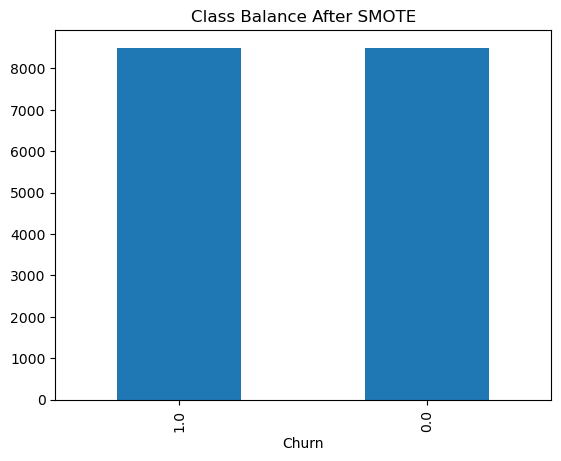

In [48]:
usampled_df['Churn'].value_counts().plot(kind='bar', title='Class Balance After SMOTE')

In [49]:
x = usampled_df.drop('Churn',axis=1)
y = usampled_df['Churn']

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=.25, random_state=42)

In [51]:
classifiers = {
    'LogisticRegression': LogisticRegression(),
    'SGDClassifier': SGDClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'XGBClassifier': XGBClassifier(verbose=0),
    'CatBoostClassifier': CatBoostClassifier(verbose=0),
    'LGBMClassifier': LGBMClassifier(verbose=0),
}

In [52]:
for key, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    val_score = cross_val_score(classifier, x_train, y_train)
    print(f'{key:<30} {val_score.mean():<30.2f}')

LogisticRegression             0.71                          
SGDClassifier                  0.57                          
DecisionTreeClassifier         0.84                          
RandomForestClassifier         0.92                          
AdaBoostClassifier             0.86                          
SVC                            0.71                          
KNeighborsClassifier           0.76                          
XGBClassifier                  0.93                          
CatBoostClassifier             0.93                          
LGBMClassifier                 0.93                          


In [53]:
def f1_(models : dict, x_test,y_test):
    names = []
    scores = []

    for name, model in models.items():
        y_pred = model.predict(x_test)
        score = f1_score(y_test, y_pred)
        names.append(name)
        scores.append(round(score, 4))
        fig = go.Figure(data=[go.Table(
        header=dict(
            values=['<b>Model</b>', '<b>F1 Score on Test Data</b>'],
            fill_color='lightgray',
            align='center',
            font=dict(size=16)
        ),
        cells=dict(
            values=[names, scores],
            fill_color='white',
            align='center',
            font=dict(size=14)
        )
    )])

    fig.update_layout(title='F1 Score of Models on Test Set', width=700, height=500)
    fig.show()

In [54]:
f1_(classifiers,x_test, y_test)

In [55]:
def confusion_mat(models: dict, x_test, y_test):
    for name, model in models.items():
        y_pred = model.predict(x_test)
        
        # Compute confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        
        # Create heatmap
        fig = ff.create_annotated_heatmap(
            z=cm,
            x=['Not Churn', 'Churn'],           # True labels
            y=['Predicted Not Churn', 'Predicted Churn'],  # Predicted labels
            colorscale='Fall',
            xgap=3, ygap=3
        )
        
        fig['data'][0]['showscale'] = True
        fig.update_layout(
            title=f'Confusion Matrix for {name}',
            width=500,
            height=400
        )
        fig.show()

In [56]:
confusion_mat(classifiers,x_test,y_test)

## Using GridScearchCV

In [57]:
param_grid = {
    'LogisticRegression': {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 500]
    },
    'SGDClassifier': {
        'loss': ['hinge', 'log_loss', 'modified_huber'],
        'penalty': ['l2', 'l1', 'elasticnet'],
        'alpha': [1e-4, 1e-3, 1e-2],
        'max_iter': [1000],
        'learning_rate': ['optimal', 'adaptive']
    },
    'DecisionTreeClassifier': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True, False]
    },
    'AdaBoostClassifier': {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.5, 1, 1.5]
    },
    
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # 1=Manhattan, 2=Euclidean
    },
    'XGBClassifier': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 1.0],
        'colsample_bytree': [0.7, 1.0]
    },
    'CatBoostClassifier': {
        'iterations': [100, 200],
        'depth': [4, 6, 8],
        'learning_rate': [0.01, 0.1],
        'l2_leaf_reg': [1, 3, 5]
    },
    'LGBMClassifier': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [31, 50],
        'max_depth': [-1, 10, 20]
    }
}

In [58]:
results = []

for name, model in classifiers.items():
    if name == 'SVC':
        continue
    print(f"Running GridSearch for {name}...")
    
    grid = GridSearchCV(model,
                        param_grid[name],
                        cv=5,
                        scoring='f1',
                        n_jobs=-1,
                        verbose=0)
    grid.fit(x_train, y_train)

    best_model = grid.best_estimator_
    test_pred = best_model.predict(x_test)
    f1 = f1_score(y_test, test_pred)

    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'CV Best Score': round(grid.best_score_, 4),
        'Test F1 Score': round(f1, 4)
    })

    print(f"{name} done - Test F1: {round(f1, 4)}\n")


results_df = pd.DataFrame(results)
display(results_df)

Running GridSearch for LogisticRegression...
LogisticRegression done - Test F1: 0.8166

Running GridSearch for SGDClassifier...
SGDClassifier done - Test F1: 0.6932

Running GridSearch for DecisionTreeClassifier...
DecisionTreeClassifier done - Test F1: 0.8436

Running GridSearch for RandomForestClassifier...
RandomForestClassifier done - Test F1: 0.9351

Running GridSearch for AdaBoostClassifier...
AdaBoostClassifier done - Test F1: 0.9165

Running GridSearch for KNeighborsClassifier...
KNeighborsClassifier done - Test F1: 0.7682

Running GridSearch for XGBClassifier...
XGBClassifier done - Test F1: 0.9345

Running GridSearch for CatBoostClassifier...
CatBoostClassifier done - Test F1: 0.9352

Running GridSearch for LGBMClassifier...
LGBMClassifier done - Test F1: 0.9367



Model                                        Best Params  \
0      LogisticRegression  {'C': 10, 'max_iter': 100, 'penalty': 'l2', 's...   
1           SGDClassifier  {'alpha': 0.0001, 'learning_rate': 'optimal', ...   
2  DecisionTreeClassifier  {'criterion': 'gini', 'max_depth': 20, 'min_sa...   
3  RandomForestClassifier  {'bootstrap': False, 'max_depth': None, 'min_s...   
4      AdaBoostClassifier        {'learning_rate': 1.5, 'n_estimators': 200}   
5    KNeighborsClassifier  {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}   
6           XGBClassifier  {'colsample_bytree': 0.7, 'learning_rate': 0.2...   
7      CatBoostClassifier  {'depth': 8, 'iterations': 200, 'l2_leaf_reg':...   
8          LGBMClassifier  {'learning_rate': 0.1, 'max_depth': -1, 'n_est...   

   CV Best Score  Test F1 Score  
0         0.8234         0.8166  
1         0.6771         0.6932  
2         0.8380         0.8436  
3         0.9248         0.9351  
4         0.9119         0.9165  
5         0.7626         0.7682  
6         0.9319         0.9345  
7         0.9321         0.9352  
8         0.9335         0.9367